<a href="https://colab.research.google.com/github/johanhoffman/DD2365-DD3371-VT19/blob/master/DD2365-DD3371-template-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2365/DD3371 Advanced Computation in Fluid Mechanics, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course 
# DD2365/DD3371 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# Setup environment

In [0]:
# Setup FEniCS environment 

from google.colab import files

try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common 
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

import dolfin.common.plotting as fenicsplot
import matplotlib.pyplot as plt

import time 

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

dolfin version: 2018.1.0


# Generate domain and mesh

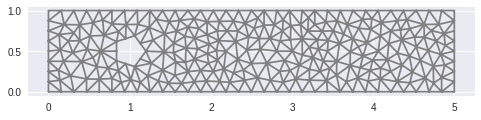

In [0]:
xmin = 0
xmax= 5
ymin = 0
ymax = 1

xc = 1
yc = 0.5
radius = 0.2

domain = Rectangle(Point(xmin,ymin),Point(xmax,ymax)) - Circle(Point(xc,yc),radius)

mesh_resolution = 20
mesh = generate_mesh(domain,mesh_resolution)

plot(mesh)


# Define function spaces

In [0]:
VE = VectorElement("CG", mesh.ufl_cell(), 1)
QE = FiniteElement("CG", mesh.ufl_cell(), 1)
WE = VE *QE

V = FunctionSpace(mesh, VE)
Q = FunctionSpace(mesh, QE)
W = FunctionSpace(mesh, WE)